# Opgave DBSCAN

In deze opgave gaan we voor de verandering werken met de iris-dataset. We hebben hiervoor gekozen omdat het een fijne kleine en overzichtelijke dataset is en omdat deze inmiddels al voldoende is toegelicht.

Omdat we nu unsupervised te werk gaan, maken we geen gebruik van de `y`-vector. We willen kijken of we een [DBSCAN-model](https://scikit-learn.org/stable/modules/clustering.html#dbscan) kunnen maken dat de data in verschillende klassen kan classificeren. Om deze classificatie inzichtelijk te maken, hebben we een hulpfunctie `plot_dbscan` gemaakt, die je hieronder ziet staan. Bestudeer eventueel deze code om een beeld te krijgen van hoe hij werkt en wat de bedoeling is.

Run de onderstaande cel om de noodzakelijke imports uit te voeren.

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

Run de onderstaande cel om de methode `plot_dbscan` te definiëren.

In [4]:
def plot_dbscan(model, X, **labels):
    core_mask = np.zeros_like(model.labels_, dtype=bool)
    core_mask[model.core_sample_indices_] = True
    anomalies_mask = model.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = model.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=model.labels_[core_mask], marker='o', s=100, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], c=model.labels_[core_mask], marker='^', s=20, label='klasse')
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100, label='uitbijter')
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=model.labels_[non_core_mask], marker=".", label='non-core')
    
    x_str = '$x_1$' if not 'xlabel' in labels else labels['xlabel']
    y_str = '$x_2$' if not 'ylabel' in labels else labels['ylabel']
    plt.xlabel(x_str, fontsize=14)
    plt.ylabel(y_str, fontsize=14)
    plt.legend()
    plt.title(f"eps={model.eps:.2f}, min_samples={model.min_samples}", fontsize=14)

Laad de iris-dataset van uit `sklearn-datasets`. Zoals tijdens het theoriecollege is toegelicht zijn &epsilon; (`eps`) en het aantal samples in de omgeving van het gekozen datapunt de belangrijkste parameters van DBSCAN. Maak verschillende modellen met (in ieder geval) de onderstaande waarden voor deze parameters. Maak telkens een plot en registreer het aantal klassen, uitbijters en non-core observaties.

```
  min_samples: [3, 4, 5, 7, 9]
  eps{ [.1, .4, .55, .6, 1, 2]
```

Maak vervolgens een interessante visualisatie van deze gegevens om inzichtelijk te krijgen wat de effecten van de verschillende waarden voor deze parameters zijn. Kun je verklaren wat er gebeurt?

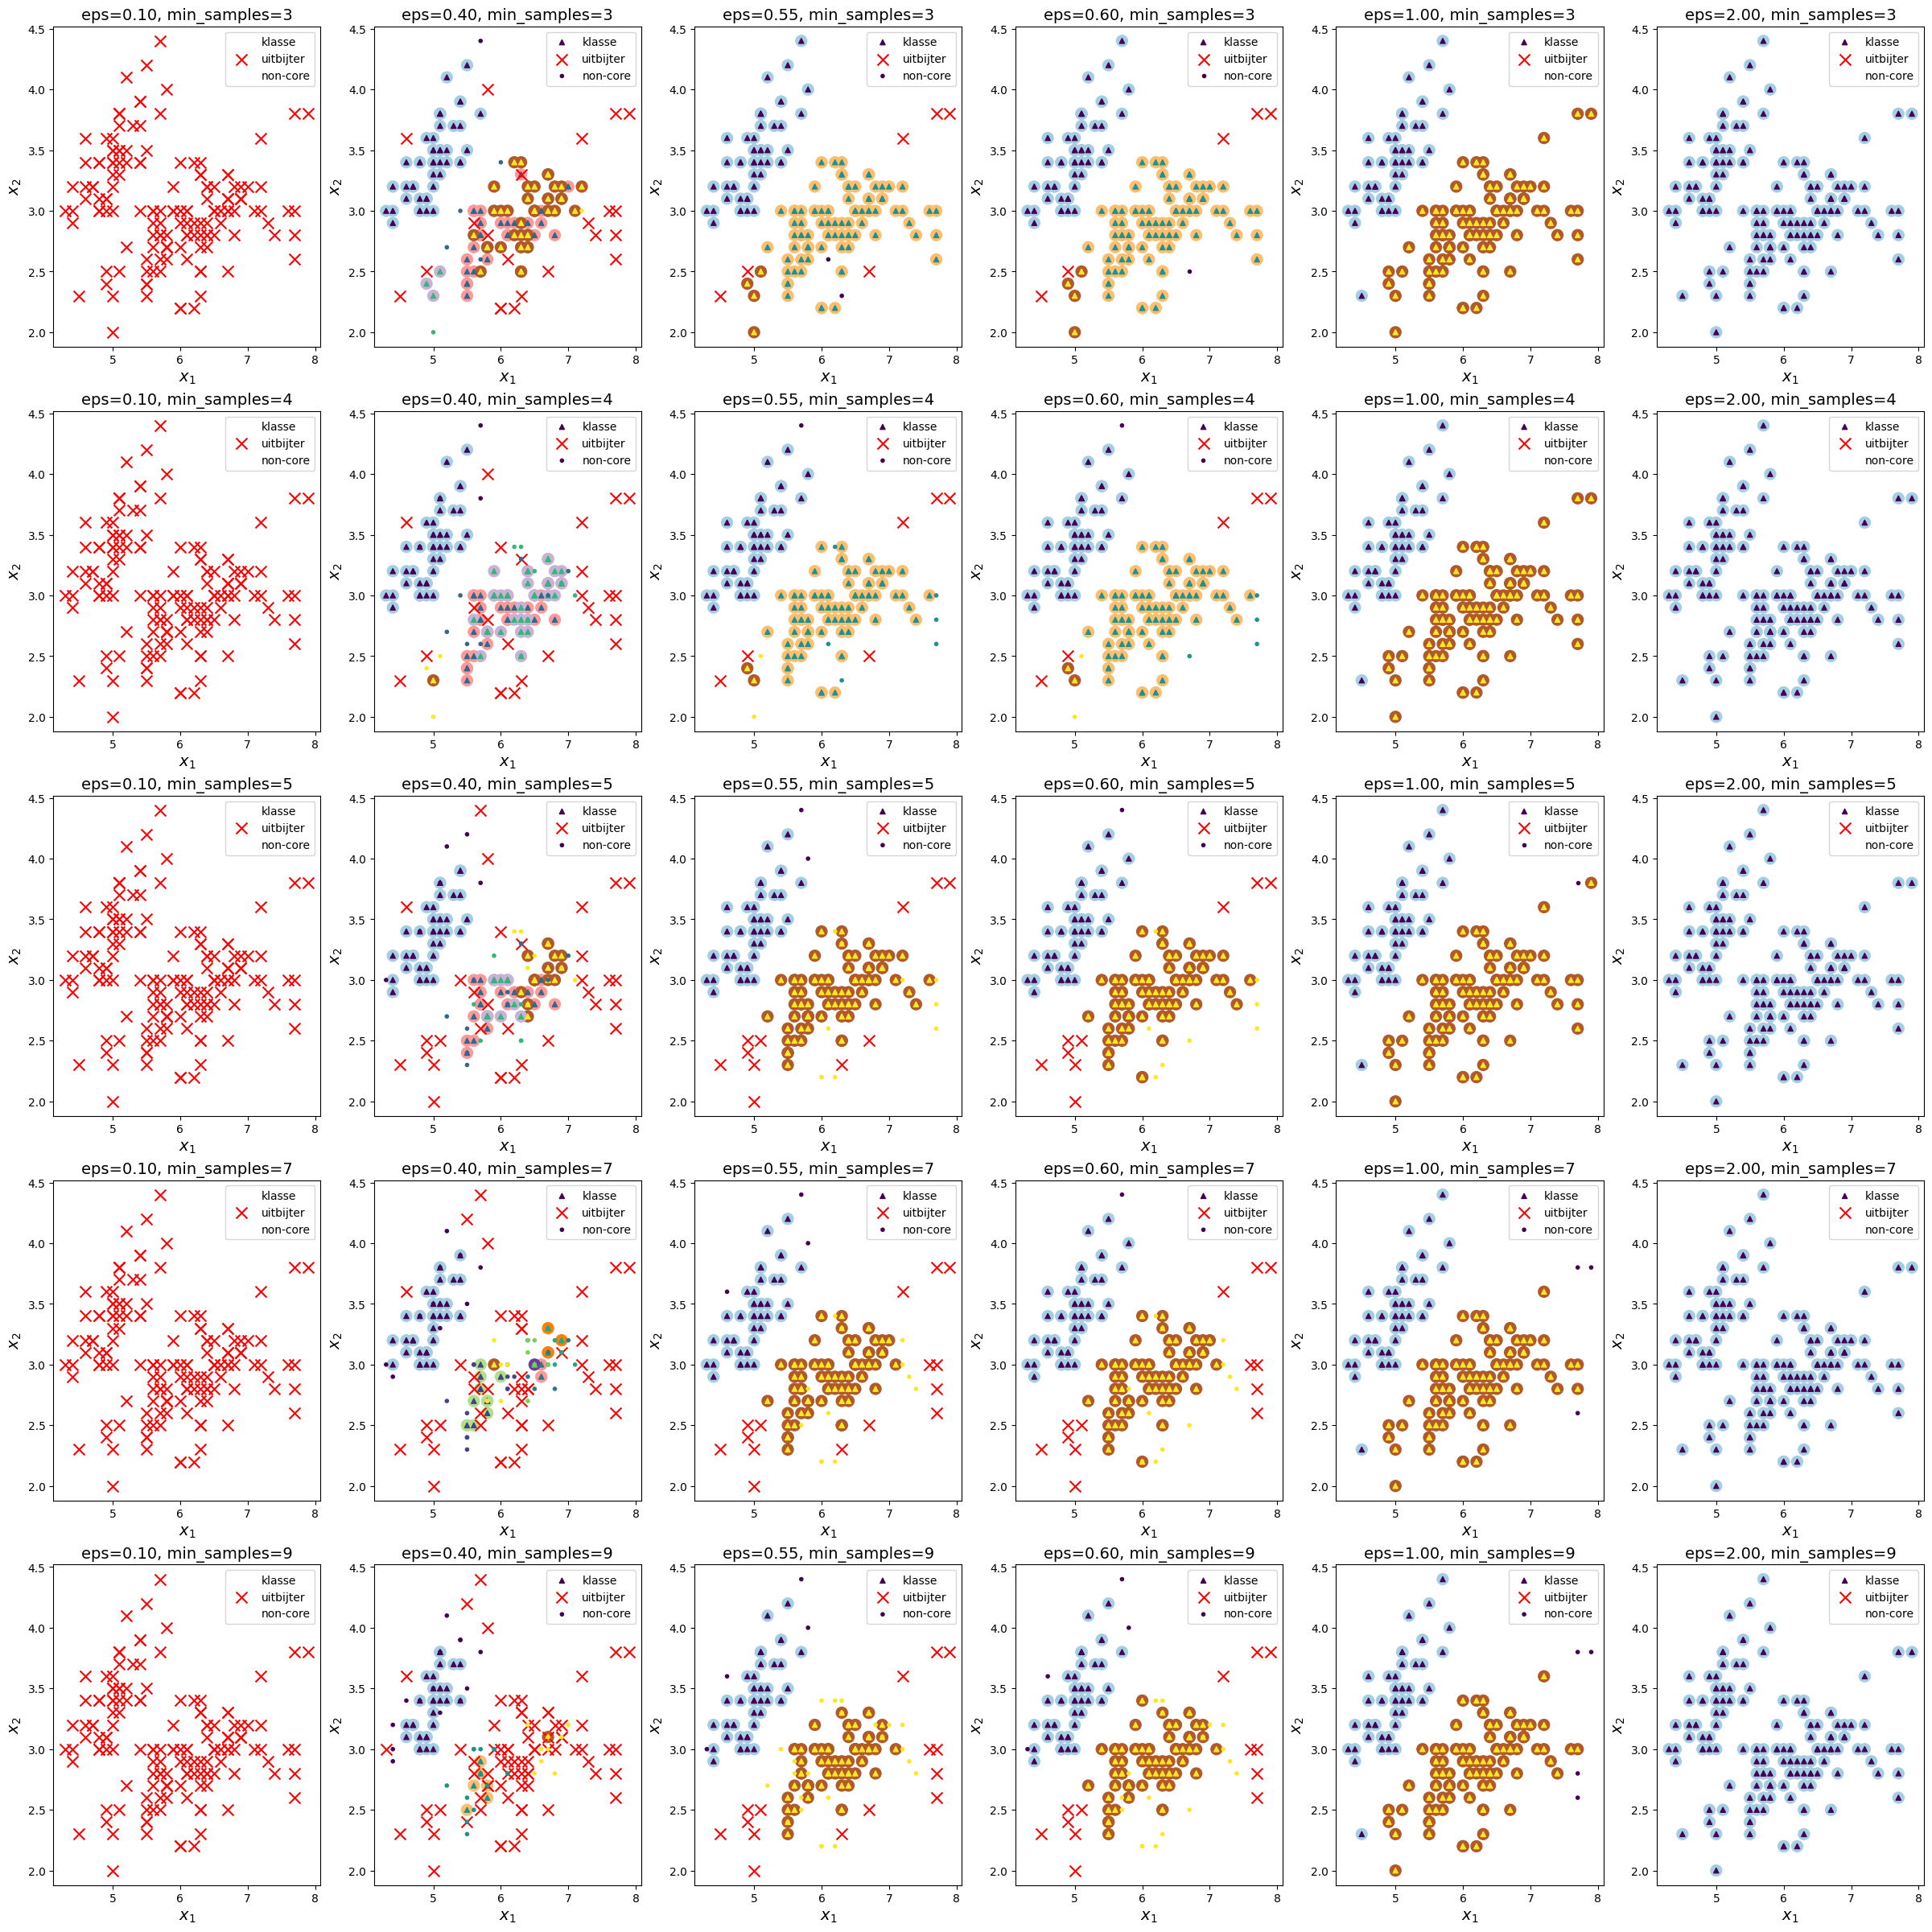

In [5]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
min_samples = [3, 4, 5, 7, 9] # Amount of core points
eps = [.1, .4, .55, .6, 1, 2] # Radius

plt.figure(figsize=(30, 30)) # Size of each plot
i = 1
for points in min_samples:
    for e in eps:
        db_scan = DBSCAN(eps=e, min_samples=points)
        db_scan.fit(X, y)
        plt.subplot(len(min_samples), len(eps), i)
        plot_dbscan(db_scan, X)
        i += 1

# Antwoord: Plot evaluatie
We zien hier de verschillende groeperingen van de data, gebaseerd op de door ons gegeven `aantal core points` en `epsilon (radius)`. Als eerste valt op dat epsilon .1 te klein is, en alleen maar uitbijters geeft. Epsilon 2 is te groot want die geeft maar 1 groep.

Epsilon 0.6 en 1.0 zijn beide mooi. Ze verdelen de data in 2 of 3 groepen, en hebben geen tot weinig uitbijters.
Bij epsilon 0.6 vallen minsamples 7 en 9 af omdat hier toch wel veel uitbijters zijn.
Maar welke van deze overige 7 plots dan het beste is ... ?

### Kyra
Vindt dat epsilon 0.6 met min_samples 3, 4 of 5 het mooiste is. 5 maakt echt mooi 2 groepen en geeft de punten die hier buiten vallen de status uitbijter. 3 en 4 maken een derde groep, maar wel één die niet heel raar is.

### Matthias
Vindt dat epsilon 1.0 mooier is aangezien alle punten verdeeld zijn over twee groepen. Geen uitbijters dus dat is fijn.
Alleen is de twijfel nog of het beter is om meer of minder non-core points te hebben.

### Bart
Hij zal het wel weten.